<a href="https://colab.research.google.com/github/MicroprocessorX069/Image-morphology-segmentation-and-Hough-transform/blob/master/Hough_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 import matplotlib.pyplot as plt
import numpy as np
import cv2
def convolution11(input_image, kernel,threshold):
  
  w_input=len(input_image[0])
  h_input=len(input_image)
  input_image=np.array(input_image)
  padded_input=pad_image(input_image,int((len(kernel)-1)/2),int((len(kernel[0])-1)/2))
  padded_input=np.array(padded_input)
  kernel=flip(kernel)
  sum_kernel=np.sum(kernel)
  new_image=np.zeros((len(input_image)+1,len(input_image[0])+1))

  for input_x in range(0,h_input):
    for input_y in range(0,w_input):
        new_image[input_x,input_y]=0
        sum_img=0
        for kernel_x in range(0,len(kernel)):
           for kernel_y in range(0,len(kernel[0])):
              new_image[input_x,input_y]=int(new_image[input_x,input_y]) + int(padded_input[input_x+kernel_x, input_y+kernel_y])*int(kernel[kernel_x,kernel_y])
        
        if new_image[input_x,input_y]>= threshold:
          new_image[input_x,input_y]=0
        else:
          new_image[input_x,input_y]=1
        
 
  return(new_image)

def flip(matrix):
  new_matrix=np.zeros((matrix.shape))
  matrix=np.array(matrix)
  l=len(matrix)
  for i in range(l):
    for j in range(l):
      new_matrix[i,j]=matrix[l-i-1,l-j-1]
  return(new_matrix)

def negative(input_image):
  #new_image2=np.zeros((len(input_image),len(input_image[0])))
  for x in range(len(input_image)):
     for y in range(len(input_image[0])):
         input_image[x,y]=255-input_image[x,y]
          
  return(input_image)

def pad_image(image,pad_x,pad_y):
  image_x=len(image[0])
  image_y=len(image)
  padded_image=np.zeros((image_y+pad_y*2,image_x+pad_x*2))
  padded_image_x=len(padded_image[0])
  padded_image_y=len(padded_image)
  
  for i in range(pad_y,image_y+pad_y):
    for j in range(pad_x, image_x+pad_x):
      padded_image[i,j]=image[i-pad_y,j-pad_x]
  return(padded_image)



# def erode(input_image,kernel):
#   w_kernel=len(kernel[0])
#   new_image=convolution11(input_image,kernel,1)
#   return(new_image)
# def dilate(input_image,kernel):
#   w_kernel=len(kernel[0])
#   new_image=convolution11(input_image,kernel,w_kernel)
#   return(new_image)
# def detect(input_image,kernel):

##Temp functions

In [0]:
import numpy as np
import math
def hough_lines(input_img):
  w_img=len(input_img[0])
  l_img=len(input_img)
  print(w_img,l_img)
  mid_x=int(w_img/2)
  mid_y=int(l_img/2)
  input_img=np.array(input_img)
  origin=np.array([0,0])
  d_limit=int(pow(pow(w_img,2)+pow(l_img,2),0.5))
  #hough_mat=np.ones((600,361,3)) # d x theta
  max_d=int(pow(pow(w_img,2)+pow(l_img,2),0.5))
  print(max_d)
  hough_image=np.ones((2*max_d+1,180))
  
  #hough_list=[]
  
  for input_y in range(l_img):
    for input_x in range(w_img):
       if input_img[input_y,input_x]==0 and input_x!=0: # if the pixel color is white
           #estimating gradient of that pixel position
          actual_x=input_y-mid_x
          actual_y=input_x-mid_y
          gradient=-90
          while gradient <= 90:
            gradient=math.radians(gradient)
            #Finading d
            d=int(input_x*math.cos(gradient)+input_y*math.sin(gradient))
            gradient=int(math.degrees(gradient))
            #print(d,gradient)
            hough_image[max_d+d, 90+gradient]+=1
#             hough_mat[w_img+d,gradient,2]+=1
#             hough_mat[w_img+d,gradient,1]=gradient
#             hough_mat[w_img+d,gradient,0]=d
#             hough_list.append([gradient,d])
            gradient=gradient+2
  return hough_image


import numpy as np
import math
def hough_lines2(input_img):
  w_img=len(input_img[0])
  l_img=len(input_img)
  mid_x=int(w_img/2)
  mid_y=int(l_img/2)
  input_img=np.array(input_img)
  origin=np.array([0,0])
  d_limit=int(pow(pow(w_img,2)+pow(l_img,2),0.5))
  hough_mat=np.ones((800,360,3)) # d x theta
  hough_image=np.ones((800,360)) # d x theta
  hough_list=[]
  
  max=0
  for input_y in range(l_img):
    for input_x in range(w_img):
       if input_img[input_y,input_x]==0 and input_x!=0: # if the pixel color is white
          actual_x=input_y-mid_x
          actual_y=input_x-mid_y
          #estimating gradient of that pixel position
          gradient=math.atan(input_y/input_x)
          #Finading d
          d=int(input_x*math.cos(gradient)-input_y*math.sin(gradient))
          #d=int(actual_x*math.cos(gradient)+actual_y*math.sin(gradient))
          gradient=int(math.degrees(gradient))
          #print(d,gradient)
          hough_image[w_img+d,gradient]=0
          hough_mat[w_img+d,gradient,2]+=1
          hough_mat[w_img+d,gradient,1]=gradient
          hough_mat[w_img+d,gradient,0]=w_img+d
          hough_list.append([gradient,d])
                               
  return hough_mat,hough_image

def negative_forBinary(input_image):
  #new_image2=np.zeros((len(input_image),len(input_image[0])))
  for x in range(len(input_image)):
     for y in range(len(input_image[0])):
         if input_image[x,y]==1:
            input_image[x,y]=0
         else:
            input_image[x,y]=1
          
  return(input_image)


In [62]:
hough_bins[706,90][27]

[301, 27]

In [0]:
hough

##Final Functions

In [0]:
import numpy as np
import math
import cv2 as cv

def find_peaks2(input_image,hough_bins,voting_threshold):
  input_image=np.array(input_image)
  w_img=input_image.shape[1]
  l_img=input_image.shape[0]
  lines=[]
  for x in range(l_img):
    for y in range(w_img):
      if input_image[x,y]>= voting_threshold:
        input_image[x,y]=255
        x1,y1=hough_bins[x,y][1]
        x2,y2=hough_bins[x,y][len(hough_bins[x,y])-1]
        lines.append([x1,y1,x2,y2])
      else:
        input_image[x,y]=0
  return np.array(lines)

def hough_lines(input_img):
  w_img=len(input_img[0])
  l_img=len(input_img)
  mid_x=int(w_img/2)
  mid_y=int(l_img/2)
  input_img=np.array(input_img)
  origin=np.array([0,0])
  max_d=int(pow(pow(w_img,2)+pow(l_img,2),0.5))
  hough_image=np.ones((2*max_d+1,180))
  #hough_bins=np.zeros((2*max_d+1,180))
  hough_bins=[[[] for y in range(180)]  for x in range(2*max_d+1)]
  
  for input_y in range(l_img):
    for input_x in range(w_img):
       if input_img[input_y,input_x]==0 and input_x!=0: # if the pixel color is white
           #estimating gradient of that pixel position
          gradient=-30
          while gradient <= 30:
            gradient=math.radians(gradient)
            #Finading d
            d=int(input_x*math.cos(gradient)+input_y*math.sin(gradient))
            gradient=int(math.degrees(gradient))
            #print(d,gradient)
            hough_image[max_d+d, 90+gradient]+=1
            hough_bins[max_d+d][90+gradient].append([input_x,input_y])
            gradient=gradient+2
  #peak_image=find_peaks(hough_image,20)
  hough_bins=np.array(hough_bins)
  lines=find_peaks2(hough_image,hough_bins,60)
  
  output_image=input_image
  for i in range(1,lines.shape[0]):
    cv.line(output_image,(lines[i,0],lines[i,1]),(lines[i,2],lines[i,3]),255,5)
  cv.imwrite("red_line.jpg",output_image)
  print("Saved as red_line.jpg")
  

def hough_lines2(input_img):
  w_img=len(input_img[0])
  l_img=len(input_img)
  mid_x=int(w_img/2)
  mid_y=int(l_img/2)
  input_img=np.array(input_img)
  origin=np.array([0,0])
  max_d=int(pow(pow(w_img,2)+pow(l_img,2),0.5))
  hough_image=np.ones((2*max_d+1,180))
  #hough_bins=np.zeros((2*max_d+1,180))
  hough_bins=[[[] for y in range(180)]  for x in range(2*max_d+1)]
  
  for input_y in range(l_img):
    for input_x in range(w_img):
       if input_img[input_y,input_x]==0 and input_x!=0: # if the pixel color is white
           #estimating gradient of that pixel position
          gradient=-50
          while gradient <= -30:
            gradient=math.radians(gradient)
            #Finading d
            d=int(input_x*math.cos(gradient)+input_y*math.sin(gradient))
            gradient=int(math.degrees(gradient))
            #print(d,gradient)
            hough_image[max_d+d, 90+gradient]+=1
            hough_bins[max_d+d][90+gradient].append([input_x,input_y])
            gradient=gradient+2
  #peak_image=find_peaks(hough_image,20)
  hough_bins=np.array(hough_bins)
  lines=find_peaks2(hough_image,hough_bins,55)
  
  output_image=input_image
  for i in range(1,lines.shape[0]):
    cv.line(output_image,(lines[i,0],lines[i,1]),(lines[i,2],lines[i,3]),255,5)
  cv.imwrite("blue_lines.jpg",output_image)
  print("Saved as blue_lines.jpg")
  


def negative_forBinary(input_image):
  for x in range(len(input_image)):
     for y in range(len(input_image[0])):
         if input_image[x,y]==1:
            input_image[x,y]=0
         else:
            input_image[x,y]=1
          
  return(input_image)

def find_peaks(hough_image,window_size=10):
  peak_image=np.ones(hough_image.shape)
  w_img=hough_image.shape[1]
  l_img=hough_image.shape[0]
  y,x=0,0
  
  while y+window_size<=l_img:
    while x+window_size<=w_img:
      temp=hough_image[y:y+window_size,x:x+window_size]
      max_y,max_x=np.unravel_index(np.argmax(temp),(temp.shape))
      peak_image[y+max_y,x+max_x]=np.amax(temp)
      x+=window_size
    y+=window_size
  return peak_image    

def find_twoPoints(d,grad):
  y1=20
  y2=0
  grad=math.radians(grad)
  if(math.cos(grad)!=0):
    x1=(d-y1*math.sin(grad))/math.cos(grad)
    x2=(d-y2*math.sin(grad))/math.cos(grad)
  else:
    x1=0
    x2=0
  return x1, y1, x2, y2


##Driver


In [97]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
#black =0
#white=1
vertical_kernel=np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])
slant_kernel=np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]])
input_image=cv2.imread("hough.jpg",cv2.IMREAD_GRAYSCALE) #make sure the path to the image is in String format
vertical_detection=convolution11(input_image,vertical_kernel,100)
hough_lines(vertical_detection)
input_image=cv2.imread("hough.jpg",cv2.IMREAD_GRAYSCALE)
slant_detection=convolution11(input_image,slant_kernel,50)
#vertical_lines= hough_lines2(slant_detection)
hough_lines2(slant_detection)

'Saved as blue_lines.jpg'

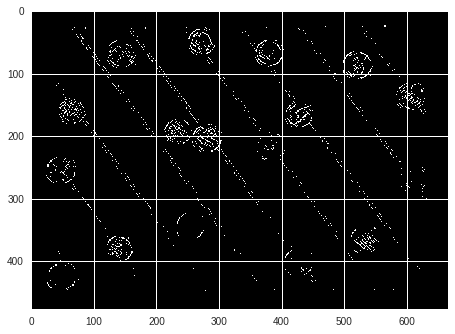

In [94]:
input_image=cv2.imread("hough.jpg",cv2.IMREAD_GRAYSCALE)
slant_detection=convolution11(input_image,slant_kernel,60)
#cv.imwrite("slant_detection.jpg",slant_detection)
plt.imshow(slant_detection)

In [68]:
import cv2 as cv
output_image=input_image
for i in range(1,vertical_lines.shape[0]):
  cv.line(output_image,(vertical_lines[i,0],vertical_lines[i,1]),(vertical_lines[i,2],vertical_lines[i,3]),255,15)
cv.imwrite("verticalLines.jpg",output_image)

True

In [54]:
vertical_lines.shape

(3, 4)

In [55]:
vertical_lines

array([[  1, 268,  51, 268],
       [301,   0, 301,  50],
       [302,   0, 302,  50]])

In [0]:

import numpy as np
import cv2 as cv

x1,y1,x2,y2=int(vertical_points[2,0]),int(vertical_points[2,1]),int(vertical_points[2,2]),int(vertical_points[2,3])
cv.imwrite("peaksVertical.jpg",cv.line(input_image,(x1,y1),(x2,y2),(255,84,23),5))


True

In [0]:
cv.imwrite("peaksVertical.jpg",peaks_vertical)
cv.imwrite("peaksSlant.jpg",slant_peaks)

True